# `atoms()`.
Es importante "atimimzar" una expresion para anilizar **todo** su contenido.

In [1]:
import sympy as sp
from sympy import I
from sympy.abc import x, y

In [4]:
At= (1 + x + 2*sp.sin(y + I * sp.pi)).atoms()
display(At)
type(At)

{1, 2, I, pi, x, y}

set

In [7]:
ListAt = list(At)
ListAt

[1, 2, y, x, I, pi]

In [9]:
ListAt[1]

2

In [12]:
from sympy import Number, NumberSymbol, Symbol # Symbol=variables
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Symbol)

{x, y}

In [14]:
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Number, NumberSymbol)

{1, 2, pi}

In [15]:
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Number, NumberSymbol, I)


{1, 2, I, pi}

In [16]:
from sympy import Function, Mul # funciones y multiplicaciones
from sympy.core.function import AppliedUndef

f = Function("f")
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(Function)

{f(x), sin(y + I*pi)}

In [17]:
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(AppliedUndef)

{f(x)}

In [18]:
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(Mul)

{2*sin(y + I*pi), I*pi}

## Suposiciones sobre simbolos (assumptions)

In [20]:
from sympy import symbols
n = symbols('n', positive=True, integer=True)
n.is_positive

True

In [21]:
n.is_integer

True

In [24]:
# si quiere saber las suposiciones sobre n
n.assumptions0

{'positive': True,
 'commutative': True,
 'hermitian': True,
 'complex': True,
 'extended_nonzero': True,
 'nonnegative': True,
 'imaginary': False,
 'extended_nonnegative': True,
 'nonpositive': False,
 'real': True,
 'extended_real': True,
 'zero': False,
 'infinite': False,
 'extended_positive': True,
 'nonzero': True,
 'negative': False,
 'extended_negative': False,
 'finite': True,
 'extended_nonpositive': False,
 'integer': True,
 'irrational': False,
 'transcendental': False,
 'algebraic': True,
 'rational': True,
 'noninteger': False}

In [25]:
# dado que n es entero
(-1)**(2*n)

1

In [26]:
(-1)**(2*n+1)

-1

In [27]:
# que pasa si es real
x = symbols('x', real=True)
(-1)**(2*x)

(-1)**(2*x)

## Sumas y productos
Escribamos las siguientes expresiones

$$\sum_{i=1}^5 x+ i y = (x + y) + (x+2y) + (x+3y) + (x+4y) + (x+5y) = 5x +15 y  .$$

$$\prod_{i=1}^5 x + i y = (x + y)(x+2y)(x + 3y)(x+4y)(x+5y).$$



In [28]:
from sympy import symbols, summation, product
x,y,i = symbols('x  y   i ')
s = summation(x + i*y, (i,1,5))
s

5*x + 15*y

In [33]:
p = product( x+i*y, (i, 1,5))
p

(x + y)*(x + 2*y)*(x + 3*y)*(x + 4*y)*(x + 5*y)

In [34]:
from sympy import expand, factor
fp=expand(p)
fp


x**5 + 15*x**4*y + 85*x**3*y**2 + 225*x**2*y**3 + 274*x*y**4 + 120*y**5

In [31]:
# p.subs(n,5)

y**5*(x/y + 1)*(x/y + 2)*(x/y + 3)*(x/y + 4)*(x/y + 5)

In [35]:
factor(fp)

(x + y)*(x + 2*y)*(x + 3*y)*(x + 4*y)*(x + 5*y)

Tarea 1:

1. Escriba una funcion que calcule:

$$\prod_{i=1}^5 \sum_{j=1}^5 (ix + jy) .$$
$$\sum_{i=1}^5 \prod_{j=1}^5 (ix + jy) .$$

2. Use $n$ (simbolo que se define desde aca) en vez de $5$, y luego use
`subs' para sustituir el valor de `n` por $5$.



In [36]:
## Evaluacion de expresiones
expr = expand( (x+y)**3)
expr

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [37]:
# sustitucion
expr.subs( y, 2*x)

27*x**3

In [38]:
# otra
expr2 = expr.subs(y, 5)
expr2

x**3 + 15*x**2 + 75*x + 125

In [39]:
exprPi = expr2.subs(x, sp.pi)
exprPi

pi**3 + 125 + 15*pi**2 + 75*pi

In [40]:
# evaluacion numerica
exprPi.evalf()

539.669791715875

In [41]:
# sustituir es sinomimo de reemplazar
expr2.replace(x, sp.pi)

pi**3 + 125 + 15*pi**2 + 75*pi

In [42]:
# quisieramos reemplazar varios valores a la vez
# por ejemplo
import numpy as np
myArray = np.array([1,2,3])
exprList = expr2.subs(x, myArray)

SympifyError: SympifyError: array([1, 2, 3])

Como nos salimos de este problema.

## `lambdify`
El concepto the `lambdify` es el de converetir una **expresion** a una **funcion**.

In [43]:
from sympy import lambdify

f = lambdify(x, expr2, "numpy") # pregunta es numpy obligatorio? se puede usar sympy u otros?
exprList = f(myArray)
exprList

array([216, 343, 512])

In [44]:
f(1)

216

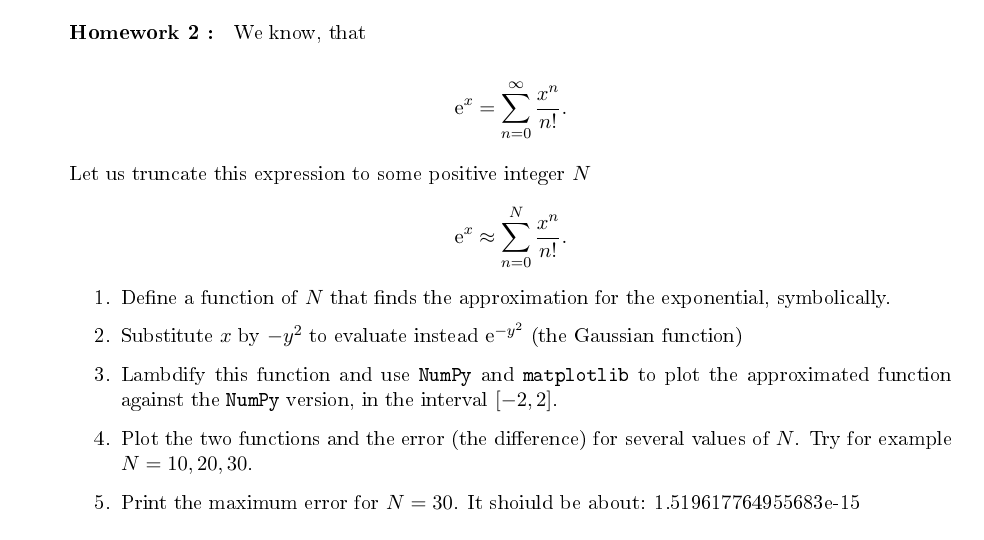

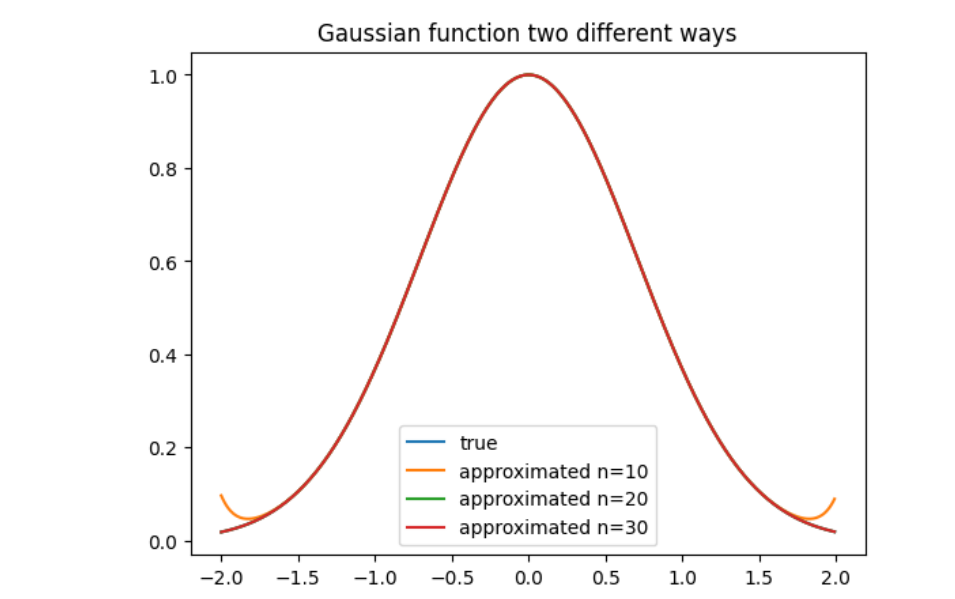

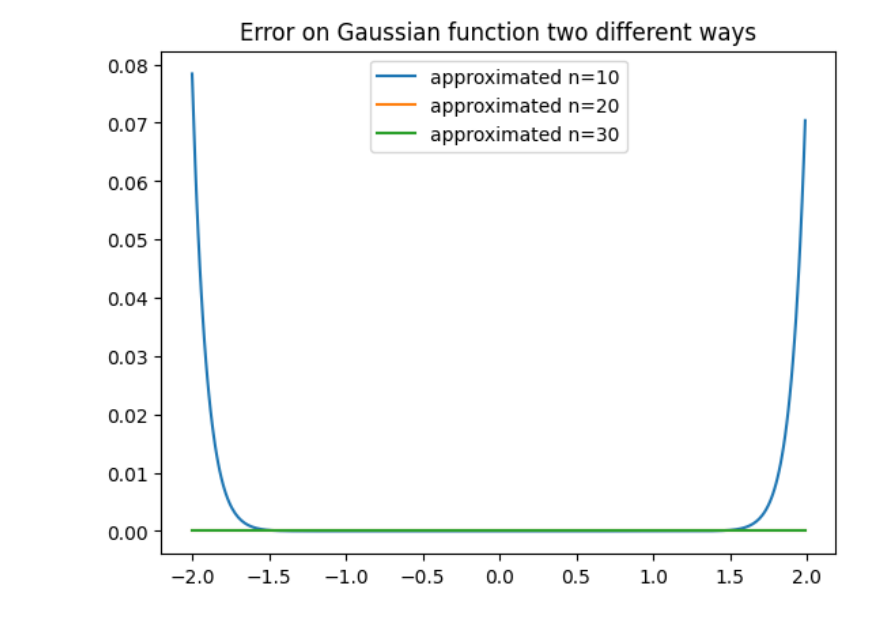

## Manipulacion de matrices
### solucion de sistemas lineales
Mostramos como resolver en `Sympy` el sistema $Ax =b$. La idea es extenderla matriz $A$ para que la ultima columna sea $b$. Es decir $M=[A | b ]$.

Ejemplo:

\begin{eqnarray}
x+ y + z &=& 5 \\
2x+ 4y + 3z &=& 2 \\
x -4 y + z &=& -1
\end{eqnarray}

Planetamos el problema en `sympy`

In [46]:
from sympy import Matrix, solve_linear_system
x,y,z = symbols('x y z ')

# note que  la sintaxis es parecida  la de NumPy
M=Matrix( [[1,1,1,5], [2,4,3,2], [1,-4,1,1]])
M # QC

Matrix([
[1,  1, 1, 5],
[2,  4, 3, 2],
[1, -4, 1, 1]])

In [47]:
# otra forma de hacer esto
A = Matrix([[1,1,1],[2,4,3],[1,-4,1]])
display(A)

b = Matrix([[5], [2], [-1]])
display(b)

Matrix([
[1,  1, 1],
[2,  4, 3],
[1, -4, 1]])

Matrix([
[ 5],
[ 2],
[-1]])

In [48]:
M = A.col_insert(3, b)
M

Matrix([
[1,  1, 1,  5],
[2,  4, 3,  2],
[1, -4, 1, -1]])

In [49]:
# resolvemos el sistema
slns = solve_linear_system(M, x, y, z)
slns

{x: 71/5, y: 6/5, z: -52/5}

## Otras funciones utiles sobre matrices.

| Method | Returns |
| :----: | ----- |
| `det()` | determinante de una matriz |
| `eigenvals()` | autovalores y sus multiplicidades |
| `eigenvects()` | autovectoresy sus correspondientes autovalores |
| `is_nilpotent()` | Si la matriz es nilpotente $A^p=I$, para $p \in \mathbb{Z}$, $p \ge 1$
| `norm()` | Frobenious, $\infty$, $p=1,2,$ |
| `nullspace()` | Espacio nulo |
| `rref()` | reduce la matriz de forma Gaussiana a echelon por filas |
| `singular_values()` | Obtiene los valores singulares (la SVD)


Veamos algunos ejemplos

In [50]:
from sympy import Matrix
M.rref()

(Matrix([
 [1, 0, 0,  71/5],
 [0, 1, 0,   6/5],
 [0, 0, 1, -52/5]]),
 (0, 1, 2))

Tarea 3: Observamos la matriz identidad a la izquierda, el vector solucion a la derecha. Pero aparece el vector $(0,1,2)$ al fina. Su mision es averiguar
que significa este vector.


Otro ejemplo. Autovalores/vectores

In [51]:
# autovalores/autovectores
A = Matrix( [[2,1,-2], [1,0,0], [0,1,0]])
A

Matrix([
[2, 1, -2],
[1, 0,  0],
[0, 1,  0]])

In [52]:
A.eigenvals()

{2: 1, 1: 1, -1: 1}

### Tarea 4:
Los autovalres de la matriz $A$ son soluciones de la ecuacion

$$p(\lambda) = \det (A - \lambda I) .$$
llamado **polinomio caracteristico**.

Encuentre los **autovalores** usando `SymPy` con detalle.

* Construya $A$
* Construya $A - \lambda I$
    **ojo** no lo llame $\lambda$, llamelo $\lambda_0$ o $\mu$. La palabra
    $\lambda$ es reservada del sistem
* Resuelva la ecuacion $p(\lambda)=0$. Puede usar `roots` o `solve()`.o




In [53]:
lambda=2

SyntaxError: invalid syntax (<ipython-input-53-e03b56cdbfd8>, line 1)

In [59]:
from sympy import Symbol
lambda = Symbol('lambda')
lambda

SyntaxError: invalid syntax (<ipython-input-59-052089b7ce15>, line 2)

# Ejemplo de la fisica.
tomado de
[Mr .P Solver](https://www.youtube.com/watch?v=1yBPEPhq54M)

Lo enunciamos hoy y lo resolvemos en la proxima clase


Un objeto cae y una plataforma (por debajo) se mueve hacia arriba.
Encontrar el punto de encuentro del objeto y la plataforma asumiento
que sus velocidades son iguales (pero con signo contrario).

Matematicalmente

1. Objeto
$$ h_0(t) = h_0 - v_0 t - \frac12 g t^2 .$$
Salvedad: El subindice $_O$ es para objeto, no para "inicial"

2. La plataforma
Asumamos que la plataforma comienza a desplazarse desde el piso

$$h_p(t) = v_p tg  + \frac12 q t^2 .$$

Tabla de simbolos

| variable | significado |
|-----------|------------|
| $t$ | tiempo |
| $h_0$ | altura inicial del objeto |
| $v_0$ | velocidad inicial del objeto |
| $v_p$ | velocidad de la plataforma|
| $g$ | constante de gravedad |
| $q$ | aceleracion de la plataforma |



Proxima clase, resolvemos el problema de fisica.